In [8]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Partie 1

In [9]:
## Question 1

# p est le vecteur des probabilités correspondant à la loi de X
# x est le vecteur des valeurs possibles pour X
# M est le nombre désiré de simulation de la variable X 
def sim_dis (p, x, M):
    y = []
    for i in range(0, M):
        u = np.random.uniform(0, 1)
        j = 1
        while ( u > np.sum(p[:j]) ):
            j += 1
        y.append(x[j-1])
    return y

In [10]:
## Test

x = [ i for i in range(10)]
probas = np.random.dirichlet(np.ones(10))

print("Considérons le vecteur x = range(0,10) des valeurs souhaitées ainsi que")
print("probas = {} l'ensemble des probabilités correspondantes".format(probas))

print("On a alors la simulation {} pour un échantillon de taille 10".format(sim_dis(probas, x, 10)))


Considérons le vecteur x = range(0,10) des valeurs souhaitées ainsi que
probas = [0.05962005 0.17467666 0.06463786 0.11699123 0.2555797  0.01832842
 0.08373192 0.02841906 0.01778004 0.18023506] l'ensemble des probabilités correspondantes
On a alors la simulation [3, 6, 9, 1, 1, 3, 4, 9, 1, 7] pour un échantillon de taille 10


In [11]:
## Question 2

# N est le nombre de pas de la marche
# S0 est la valeur initiale de la marche
# p est la probabilité de faire un pas à droite
# M est le nombre de simulation désiré
def simulation_marche(N=100, S0=5, p=0.5, M=1000):
    R = np.zeros((N + 1,M)) # matrice des résultats
    R[0] = S0
    for n in range(1, N + 1):
        sim = sim_dis([p, 1-p], [-1, 1], M) # simulation des pas
        R[n] = R[n - 1] + sim # calcul des positions
    return R

# Permet de visualiser les trajectoires de la marche
# N2 est le nombre de pas de la marche
# M2 est le nombre de simulation désiré
def simulation_visuelle_trajectoire(N2= 100, M2=10):
    arr = simulation_marche(M=M2)
    for i in range(0, M2):
        plt.plot(np.linspace(0, N2, N2+1), arr[:,i])
    plt.show()

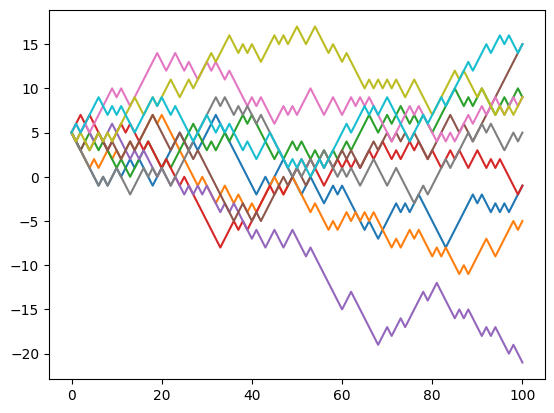

In [12]:
## Test 
simulation_visuelle_trajectoire()

In [13]:
## Question 3

def Q3_monte_carlo(N3=100, M3=1000):
    sim = simulation_marche(N=N3, M=M3)[-1]
    return sum(sim >= 5)/M3

testQ3 = Q3_monte_carlo()
print("Une estimation de la probabilité par la méthode de Monte Carlo que S_N >= 5 est {}".format(testQ3))

Une estimation de la probabilité par la méthode de Monte Carlo que S_N >= 5 est 0.572


#### Détermination de l'intervalle de confiance Q3

Pour déterminer l'intervalle de confiance à 95% de notre estimation $S_N \ge 5$, on remarque que:
- En posant une fonction indicatrice $\forall k \in [1; M], Y_k = \mathbb{1}_{S_N^k \ge 5}$, alors
    $$
    Y_k = \left\{ {1, \text{si } S_N^k \ge 5 \atop 0, \text{sinon}}\right.
    $$
- Or, la probabilité qu'on recherche est $\mathbb{P}(S_N^k \ge 5) = p_k$, et par propriété de la fonction indicatrice,
$\mathbb{E}(Y_k) = p_k$ et $Y_k \sim \mathcal{B}(1, p_k)$.
- De plus, les $Y_k$ étant iid, tous les $p_k$ sont égaux, donc on a $\forall k \in [1, M], p_k = p$ et 
$$
\forall k \in [1, M], Y_k \sim \mathcal{B}(1, p)
$$.


Etudions $\hat Y_M = \frac{1}{M}\sum_{k=1}^{M}(Y_k)$
- On a $\mathbb{E}(\hat Y_M) = \frac{1}{M}\sum_{k=1}^{M}\mathbb{E}(Y_k) =\frac{1}{M}\sum_{k=1}^{M} \mathbb{P}(S_N^k \ge 5) = \mathbb{P}(S_N^k \ge 5) = p$ car les $S_N^k$ sont iid. D'où $\hat Y_M$ est sans biais.
- On a $\mathbb{V}(\hat Y_M) = \frac{1}{M^2} * M *\mathbb{V}(Y_1) = \frac{1}{M} * [ \mathbb{E}(\mathbb{1}_{S_N^k \ge 5})^2  -  (\mathbb{E}(\mathbb{1}_{S_N^k \ge 5}))^2] = \frac{1}{M}*p*(1-p)$


D'après le théorème central limite:
$$
\sqrt{\frac{M}{p(1-p)}}|\hat Y_M - p | {\overset{Loi}{\longrightarrow}} \mathcal{N}(0, 1)
$$

Or, par la loi forte des grands nombres,  $\hat Y_M {\overset{\mathbb{P}}{\longrightarrow}} \mathbb{E}(Y_1) = p$
D'où par continuité des fonctions,
$$
\sqrt{\frac{M}{\hat Y_M(1-\hat Y_M)}}|\hat Y_M - p | {\overset{Loi}{\longrightarrow}} \mathcal{N}(0, 1)
$$

Donc par propriété sur les quantiles de la loi normale centrée réduite, en posant $q_{1 -\alpha} = - q_{\alpha} = 1.96$, avec $\alpha = 0.05$, et on a:
- $\mathbb{P} (-1.96 \le \sqrt{\frac{M}{\hat Y_M(1-\hat Y_M)}}\hat Y_M - p  \le 1.96) = 1 - \alpha = 95\%$
- $\mathbb{P} (\hat Y_M -1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}} \le p  \le \hat Y_M + 1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}}) = 95\%$

Un intervalle de confiance à 95% de notre estimation est donc $[\hat Y_M \pm 1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}}]$


#### Détermination de la vraie probabilité p pour N = 100

Si N avait été impair, alors la probabilité $S_N = 5$ est nulle donc $S_N \ge 5 = S_N \gt 5 = S_N \lt 5 = 0.5$
Ici, N est pair, donc montrons par récurrence que la valeur de p vaut $\frac{N+1}{2N}$:
- pour N = 2: Les issues possibles de S_2 sont 3, 5, 5 et 7, et les chemins sont équiprobables; donc $\mathbb(P)(S_2 = 3) = 1/4$, $\mathbb(P)(S_2 = 5) = 1/2$ et $\mathbb(P)(S_2 = 7) = 1/4$, donc $\mathbb(P)(S_2 \ge 5) = 3/4 = \frac{2+1}{2*2}$.
- Supposons l'hypothèse de récurrence vraie pour un range N fixé et montrons qu'elle reste vraie au range N + 2:
Au rang N + 1, le cas $S_2 = 5$ est impossible donc de probabilité nulle, et il y a N + 2 issues possibles.
Au rang N + 2, les (N + 2)/2 issues supérieures strictement à 5 vont toujours rester supérieurs ou égaux à 5 ( $S_{N+1}$ est différent de 5 et si $S_{N+1} = 6$ alors $S_{N+2} \ge 5$ ; de même pour $S_{N+1} \gt 6$);
et les (N+2)/2 issues inférieures strictement à 5 vont rester inférieurs ou égaux à 5 SAUF SI $S_{N+1} = 4$, auquel cas $S_{N+2} = 5$ avec une probabilité $(1/2)$ sachant $S_{N+1} = 4$, ou bien avec une probabilité $(1/2*(N+2))$.
Ainsi, $\mathbb(P)(S_{N+2} \ge 5) = 1/2 + (1/2*(N+2)) = \frac{N+3}{2*(N+2)}$. 

Par récurrence, on a alors que p vaut $\frac{N+1}{2N}$, donc pour N = 100, on a p = 101/200 = 0.505.

In [14]:
print("Ici, notre probabilité empirique est de {} et la vraie valeur est 0.505 pour M = 1000".format(testQ3))
if (0.505 > testQ3 + 1.96 * (testQ3*(1-testQ3)/1000)**(1/2) or 0.505 < testQ3 - 1.96 * (testQ3*(1-testQ3)/1000)**(1/2)):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")

Ici, notre probabilité empirique est de 0.572 et la vraie valeur est 0.505 pour M = 1000
La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%


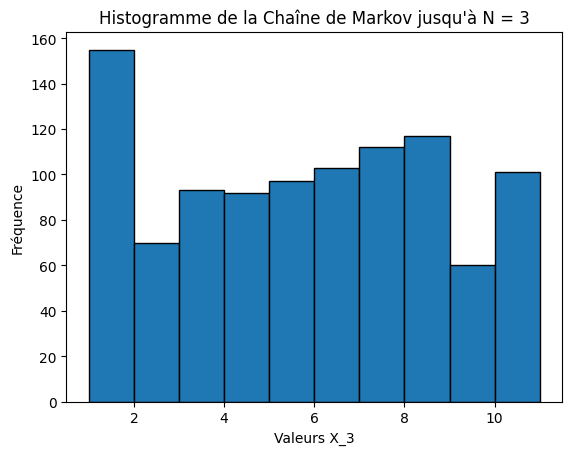

In [15]:
## Question 4

P = np.random.random((10, 10)) # Matrice de transition
P = P/np.sum(P, axis=1)[:, None] # Normalisation des lignes, pour avoir une matrice stochastique

# P4 est la matrice de transition
# N4 est le nombre de pas de la chaîne
# M4 est le nombre de simulation désiré
def Q4_chaine_markov(P4=P, N4=3, M4=1000):
    Mat = np.zeros((N4 + 1, M4), dtype=int) # Matrice des résultats
    Mat[0] = 1 # Valeur initiale
    for n in range(1, N4 + 1):
        for m in range(0, M4):
            s = sim_dis(P4[(Mat[n-1, m]) - 1], np.linspace(1, 10, 10, dtype=int), 1) # Simulation d'un pas
            Mat[n, m] = s[0]
    return Mat

plt.hist(Q4_chaine_markov()[-1], range=(1, 11), edgecolor='black', linewidth=1)
plt.xlabel("Valeurs X_3")
plt.ylabel("Fréquence")
plt.title("Histogramme de la Chaîne de Markov jusqu'à N = 3")
plt.show()

In [23]:
## Question 5

def Q5_monte_carlo(N5=3, M5=1000):
    sim = Q4_chaine_markov(N4=N5, M4=M5)[-1]
    return sum(sim == 10)/M5

testQ5 = Q5_monte_carlo()
print("Une estimation de la probabilité par la méthode de Monte Carlo que X_3 = 10 est {}".format(testQ5))

Une estimation de la probabilité par la méthode de Monte Carlo que X_3 = 10 est 0.12


#### Détermination de l'intervalle de confiance Q5

Pour déterminer l'intervalle de confiance à 95% de notre estimation $X_3 = 10$, on remarque que:
- En posant une fonction indicatrice $\forall k \in [1; M], Y_k = \mathbb{1}_{X_3^k = 10}$, alors
    $$
    Y_k = \left\{ {1, \text{si } X_3 = 10 \atop 0, \text{sinon}}\right.
    $$
- Or, la probabilité qu'on recherche est $\mathbb{P}(X_3 = 10) = p_k$, et par propriété de la fonction indicatrice,
$\mathbb{E}(Y_k) = p_k$ et $Y_k \sim \mathcal{B}(1, p_k)$.
- De plus, les $Y_k$ étant iid, tous les $p_k$ sont égaux, donc on a $\forall k \in [1, M], p_k = p$ et 
$$
\forall k \in [1, M], Y_k \sim \mathcal{B}(1, p)
$$.


Etudions $\hat Y_M = \frac{1}{M}\sum_{k=1}^{M}(Y_k)$
- On a $\mathbb{E}(\hat Y_M) = \frac{1}{M}\sum_{k=1}^{M}\mathbb{E}(Y_k) =\frac{1}{M}\sum_{k=1}^{M} \mathbb{P}(X_3 = 10) = \mathbb{P}(X_3 = 10) = p$ car les $X_i^k$ sont iid. D'où $\hat Y_M$ est sans biais.
- On a $\mathbb{V}(\hat Y_M) = \frac{1}{M^2} * M *\mathbb{V}(Y_1) = \frac{1}{M} * [ \mathbb{E}(\mathbb{1}_{X_3 = 10})^2  -  (\mathbb{E}(\mathbb{1}_{X_3 = 10}))^2] = \frac{1}{M}*p*(1-p)$


D'après le théorème central limite:
$$
\sqrt{\frac{M}{p(1-p)}}|\hat Y_M - p | {\overset{Loi}{\longrightarrow}} \mathcal{N}(0, 1)
$$

Or, par la loi forte des grands nombres,  $\hat Y_M {\overset{\mathbb{P}}{\longrightarrow}} \mathbb{E}(Y_1) = p$
D'où par continuité des fonctions,
$$
\sqrt{\frac{M}{\hat Y_M(1-\hat Y_M)}}|\hat Y_M - p | {\overset{Loi}{\longrightarrow}} \mathcal{N}(0, 1)
$$

Donc par propriété sur les quantiles de la loi normale centrée réduite, en posant $q_{1 -\alpha} = - q_{\alpha} = 1.96$, avec $\alpha = 0.05$, et on a:
- $\mathbb{P} (-1.96 \le \sqrt{\frac{M}{\hat Y_M(1-\hat Y_M)}}\hat Y_M - p  \le 1.96) = 1 - \alpha = 95\%$
- $\mathbb{P} (\hat Y_M -1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}} \le p  \le \hat Y_M + 1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}}) = 95\%$

Un intervalle de confiance à 95% de notre estimation est donc $[\hat Y_M \pm 1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}}]$


#### Détermination de la vraie probabilité p avec la matrice de transition P

On cherche $\mathbb{P}(X_3 = 10)$
D'après les formules des probabilités totales, $\mathbb{P}(X_3 = 10)$ = $\sum_{i = 1}^{i = 10} (\mathbb{P}(X_3 = 10 | X_2 = i) * \mathbb{P}(X_2 = i))$ où | est le symbole pour les probabilités conditionnelles;
d'où en réappliquant les probabilités totales, $\mathbb{P}(X_3 = 10)$ = $\sum_{i = 1}^{i = 10} [\mathbb{P}(X_3 = 10 | X_2 = i) * \sum_{j = 1}^{j = 10}(\mathbb{P}(X_2 = i | X_1 = j)) * \mathbb{P}(X_1 = j)]$
En utilisant les notations de la matrice de transition P, avec $P_{i, j}$ la probabilité à la ième ligne et jème colonne de P, on a:
$$
\mathbb{P}(X_3 = 10) = \sum_{i = 1}^{i = 10} [P_{i, 10} * \sum_{j = 1}^{j = 10}(P_{j, i}) * P_{1, j}]
$$

In [24]:
print("Détermination de la vraie probabilité p:\n")
p = 0
for i in range (0, 10):
    for j in range (0, 10):
        p += P[i][9] * P[j][i] * P[0][j]
print("Ici, notre probabilité empirique est de {} et la vraie valeur est {} pour M = 1000".format(testQ5, p))
if (p > testQ5 + 1.96 * (testQ5*(1-testQ5)/1000)**(1/2) or p < testQ5 - 1.96 * (testQ5*(1-testQ5)/1000)**(1/2)):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")

Détermination de la vraie probabilité p:

Ici, notre probabilité empirique est de 0.12 et la vraie valeur est 0.10855306361409701 pour M = 1000
La vraie valeur est donc dans l'intervalle de confiance à 95%


In [25]:
## Question 6

print("On peut montrer par récurrence qu'avec N = 100, on cherche p = P^100_(1, 10) où P^100 est la matrice de transition P à la puissance 100")

P100 = P
for i in range(1, 100):
    P100 = np.dot(P, P100) # Pour mettre P à la puissance 100, on la multiplie par elle-même
p6 = P100[0][9]

print("Pour N = 100, on a:")
testQ6 = Q5_monte_carlo(N5=100)
print("Ici, notre probabilité empirique est de {} et la vraie valeur est {} pour M = 1000".format(testQ6, p6))
if (p6 > testQ6 + 1.96 / 2 / (1000)**(1/2) or p6 < testQ6 - 1.96 / 2 / (1000)**(1/2)):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")

On peut montrer par récurrence qu'avec N = 100, on cherche p = P^100_(1, 10) où P^100 est la matrice de transition P à la puissance 100
Pour N = 100, on a:
Ici, notre probabilité empirique est de 0.112 et la vraie valeur est 0.1109000974168237 pour M = 1000
La vraie valeur est donc dans l'intervalle de confiance à 95%


La moyenne empirique du temps de survie est de 22.24 tours.


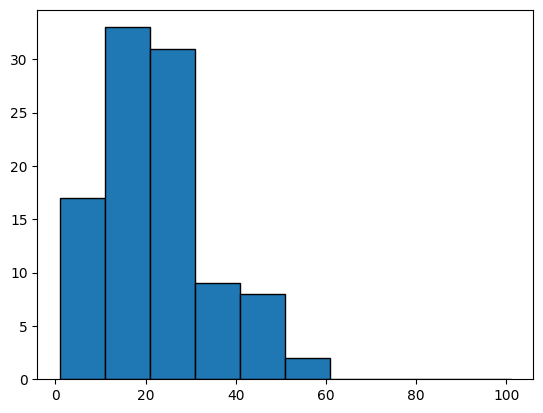

In [26]:
## Question 7

P7 = np.random.random((10, 10))
P7 = P7/np.sum(P7, axis=1)[:, None] # Normalisation des lignes, pour avoir une matrice stochastique

P7M = np.random.random((10, 10))
P7M = P7M/np.sum(P7M, axis=1)[:, None] # Normalisation des lignes, pour avoir une matrice stochastique


def death_time(Ne=5, Ns=10, P=P7, Q=P7M, N=100):
    Nb_tour = 1
    Nb_vivant = Ne
    Mat = np.zeros((N + 1, Ne), dtype=int)
    Mons = [Ns]
    Mat[0] = 1
    while (Nb_vivant > 0 and Nb_tour < N):
        s = sim_dis(Q[(Mons[-1]) - 1], np.linspace(1, 10, 10, dtype=int), 1) # Le monstre se déplace
        Mons.append(s[0])
        for m in range(0, Ne):
            if (Mat[Nb_tour-1, m] != -1):
                s = sim_dis(P[(Mat[Nb_tour-1, m]) - 1], np.linspace(1, 10, 10, dtype=int), 1)
                Mat[Nb_tour, m] = s[0]
                if (Mat[Nb_tour, m] == Mons[-1]):
                    Mat[Nb_tour, m] = -1
            else:
                Mat[Nb_tour, m] = -1
        Nb_vivant = sum(Mat[Nb_tour] != -1)
        Nb_tour += 1
    return Nb_tour - 1 # Car le premier tour n'est pas compté, c'est l'initialisation

Liste_temps = []
M = 100 # Nombre de simulation      
for i in range(0, M):
    Liste_temps.append(death_time())
plt.hist(Liste_temps, range=(1, 101), edgecolor='black', linewidth=1)
print("La moyenne empirique du temps de survie est de {} tours.".format(np.mean(Liste_temps)))

# Partie 2

In [27]:
## Question 1

# N est le nombre de pas de la marche
# S0 est la valeur initiale de la marche
# p est la probabilité de faire un pas à droite
# M est le nombre de simulation désiré
def simulation_jeu(N= 100, X0= 5, a= 10, p= 0.5, M= 1000):
    R = np.zeros((N+1, M), dtype=int) # matrice des résultats
    R[0] = X0
    for n in range(1, N + 1):
        sim = sim_dis([p, 1-p], [1, -1], M) # simulation des pas
        for m in range(0, M):
            if (R[n-1, m] == 0): # Si le joueur est mort, il ne peut pas bouger
                R[n, m] = 0
            elif (R[n-1, m] == a): # Si le joueur a gagné, il ne peut pas bouger
                R[n, m] = a
            else:
                R[n, m] = R[n-1, m] + sim[m] # calcul des positions
    return R


def simulation_visuelle_trajectoire_jeu(arr= simulation_jeu()):
    (N, M) = arr.shape
    for i in range(0, M):
        plt.plot(np.linspace(0, N-1, N), arr[:,i])
    plt.show()

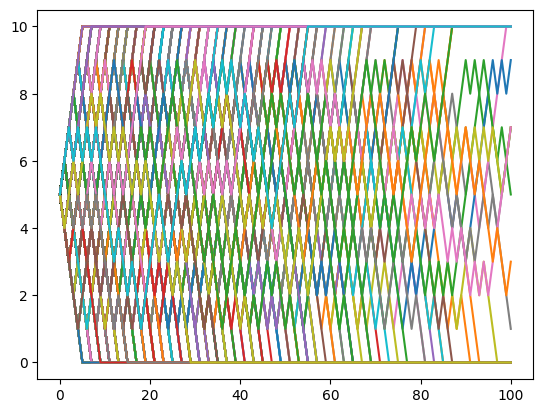

In [28]:
## Test
simulation_visuelle_trajectoire_jeu()

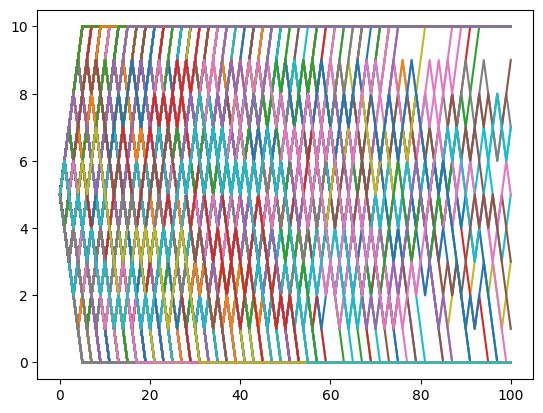

On a donc un p = 0.488


In [29]:
### a)
# R est la matrice de la question 1, de taille N+1 x M
# a est le seuil de victoire
# N est le nombre de pas de la marche
def tau_Q1(R, a= 10, N= 100, M= 1000):
    simulation_visuelle_trajectoire_jeu(R)
    T = np.zeros((M, 1), dtype=int) # matrice des résultats
    T = T + N + 1 # On initialise à N+1 pour dire que le joueur n'a pas gagné
    for m in range(0, M):
        for n in range(0, N+1):
            if (R[n, m] == 0 or R[n, m] == a): # Si le joueur est mort ou a gagné, on arrête
                T[m] = n
                break
    return T

# R est la matrice de la question 1, de taille N+1 x M
# a est le seuil de victoire
# N est le nombre de pas de la marche
# M est le nombre de simulation désiré
def Q1_a(R, a= 10, N= 100, M= 1000):
    T = tau_Q1(R, a, N, M) # On récupère les temps de victoire
    res = 0
    for i in range(0, M):
        if ( T[i] < N + 1 and R[T[i], i] == a): # Si le joueur a gagné, on incrémente
            res += 1
    return res/M

test_Q1 = Q1_a(simulation_jeu())
print("On a donc un p = {}".format(test_Q1))
    

#### Détermination de l'intervalle de confiance Q1 a)

Pour déterminer l'intervalle de confiance à 95% de notre estimation {$\tau \le N  \ et \ X_\tau = a$}, on remarque que:
- En posant une fonction indicatrice $\forall k \in [1; M], Y_k = \mathbb{1}_{{\tau \le N  \ et \ X_\tau = a}}$, alors
    $$
    Y_k = \left\{ {1, \text{si } {\tau \le N  \ et \ X_\tau = a} \atop 0, \text{sinon}}\right.
    $$
- Or, la probabilité qu'on recherche est $\mathbb{P}(\tau \le N  \ et \ X_\tau = a) = p_k$, et par propriété de la fonction indicatrice,
$\mathbb{E}(Y_k) = p_k$ et $Y_k \sim \mathcal{B}(1, p_k)$.
- De plus, les $Y_k$ étant iid, tous les $p_k$ sont égaux, donc on a $\forall k \in [1, M], p_k = p$ et 
$$
\forall k \in [1, M], Y_k \sim \mathcal{B}(1, p)
$$.


Etudions $\hat Y_M = \frac{1}{M}\sum_{k=1}^{M}(Y_k)$
- On a $\mathbb{E}(\hat Y_M) = \frac{1}{M}\sum_{k=1}^{M}\mathbb{E}(Y_k) =\frac{1}{M}\sum_{k=1}^{M} \mathbb{P}(\tau \le N  \ et \ X_\tau = a) = \mathbb{P}(\tau \le N  \ et \ X_\tau = a) = p$ car les $Y_k$ sont iid. D'où $\hat Y_M$ est sans biais.
- On a $\mathbb{V}(\hat Y_M) = \frac{1}{M^2} * M *\mathbb{V}(Y_1) = \frac{1}{M} * [ \mathbb{E}((\mathbb{1}_{\tau \le N  \ et \ X_\tau = a})^2)  -  (\mathbb{E}(\mathbb{1}_{\tau \le N  \ et \ X_\tau = a}))^2] = \frac{1}{M}*p*(1-p)$


D'après le théorème central limite:
$$
\sqrt{\frac{M}{p(1-p)}}(\hat Y_M - p ) {\overset{Loi}{\longrightarrow}} \mathcal{N}(0, 1)
$$

Or, par la loi forte des grands nombres,  $\hat Y_M {\overset{\mathbb{P}}{\longrightarrow}} \mathbb{E}(Y_1) = p$
D'où par continuité des fonctions,
$$
\sqrt{\frac{M}{\hat Y_M(1-\hat Y_M)}}(\hat Y_M - p ) {\overset{Loi}{\longrightarrow}} \mathcal{N}(0, 1)
$$

Donc par propriété sur les quantiles de la loi normale centrée réduite, en posant $q_{1 -\alpha/2} = - q_{\alpha/2} = 1.96$, avec $\alpha = 0.05$, et on a:
- $\mathbb{P} (-1.96 \le \sqrt{\frac{M}{\hat Y_M(1-\hat Y_M)}}(\hat Y_M - p)  \le 1.96) = 1 - \alpha = 95\%$
- $\mathbb{P} (\hat Y_M -1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}} \le p  \le \hat Y_M + 1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}}) = 95\%$

Un intervalle de confiance à 95% de notre estimation est donc $[\hat Y_M \pm 1.96 * \sqrt{\frac{\hat Y_M(1-\hat Y_M)}{M}}]$


### Calcul de la valeur théorique 

On définit : 
$$
f(x)=\mathbb{P}\left(X_\tau=a \mid X_0=x\right)
$$

On a que $f(0)=0, f(a)=1$, et pour tout $i$ tel que $0<i<a$
$$
\begin{aligned}
f(i) & =\mathbb{P}\left(X{\tau}=a \mid X_0=i\right) \\
& =\sum_{j=0}^{a} \mathbb{P}\left(X_{\tau}=a \mid X_0=i, X_1=j\right) \mathbb{P}\left(X_1=j \mid X_0=i\right) \quad \text { (loi de proba totale) } \\


& =\sum_{j=0}^{a} f(j) p(i, j) \quad \text { (Propriété de Markov, avec $p(i,j)$ le coefficient de la matrice de transition) } \\


& \left.=\sum_{j=1}^{a-1} f(j) p(i, j)+p(i, a) \quad \text { (parce que } f(0)=0 \text { et } f(a)=1\right)
\end{aligned}
$$

On obtient un système d'équations linéaires d'inconnues $f(1), \ldots, f(a-1)$.

On peut le réécrire sous forme matricielle et le résoudre numériquement : 

$$
F = P\cdot F + b
$$

avec : 
$$
F = (f(1), \dots, f(9))^{\intercal}, 
$$
$P$ la matrice de transition de la chaîne de Markov, et
$$
b = (0, \dots, 0, 1/2)^{\intercal}.
$$

In [30]:
#### Calcul de la vraie valeur

# Initialisation du système linéaire
F = np.zeros((9, 1))
P = np.zeros((9, 9))
for i in range(0, 9):
    if (i != 0):
        P[i, i-1] = 1/2
    if (i != 8):
        P[i, i+1] = 1/2

I = np.identity(9)
b = np.zeros((9, 1))
b[8] = 1/2

# Résolution du système linéaire
F = np.linalg.solve(I - P, b)
print("La vraie valeur théorique est : {}".format(F[4]))


print("Ici, notre probabilité empirique est de {} et la vraie valeur est 0.5 pour M = 1000".format(test_Q1))
z1 = test_Q1 - 1.96 * (test_Q1*(1-test_Q1)/1000)**(1/2)
z2 = test_Q1 + 1.96 * (test_Q1*(1-test_Q1)/1000)**(1/2)
print("L'intervalle de confiance à 95% est donc : [{}, {}]".format(z1, z2))
if (z1 > 0.5 or z2 < 0.5):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")


La vraie valeur théorique est : [0.5]
Ici, notre probabilité empirique est de 0.488 et la vraie valeur est 0.5 pour M = 1000
L'intervalle de confiance à 95% est donc : [0.4570186054284188, 0.5189813945715812]
La vraie valeur est donc dans l'intervalle de confiance à 95%


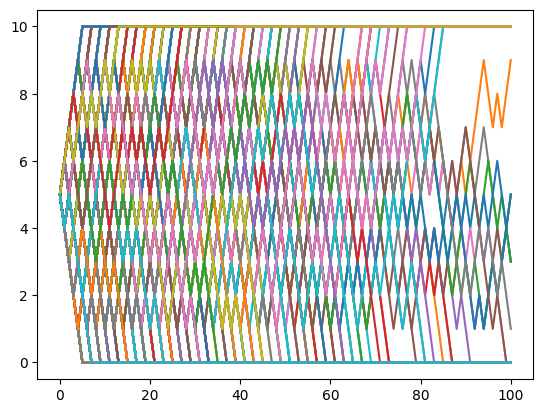

La moyenne empirique du temps de survie est de 24.064 tours.


In [31]:
### b)
tau_Q1_b = tau_Q1(simulation_jeu())
moyenne_tau = np.mean(tau_Q1_b)
print("La moyenne empirique du temps de survie est de {} tours.".format(moyenne_tau))
# C'est un nouvel échantillon mais M est assez grand pour qu'on suppose universel

#### Détermination de l'intervalle de confiance Q1 b)

Pour déterminer l'intervalle de confiance à 95% de notre estimation de la moyenne empirique, qu'on note $\hat \tau$, on remarque que:


- On a $\mathbb{E}(\hat \tau) = \mathbb{E}(\hat \tau) = \mu$
- On ne peut pas déterminer sa variance, on va donc étudier la loi de student.

$$
\sqrt{M} \frac{\hat \tau - \mu}{\sqrt{\frac{1}{M-1} \sum_{i = 1}^{M} (\tau_i - \tau_n)^2}} {\overset{Loi}{\longrightarrow}} \mathcal{T}(M-1)
$$


Donc par propriété sur les quantiles de la loi de Student, avec M = 1000, en posant $q_{1 -\alpha/2} = - q_{\alpha/2} = 1.96$ (La loi de Student approche la loi normale centrée réduite), avec $\alpha = 0.05$, et on a:
- $\mathbb{P} (-1.96 \le \sqrt{M} \frac{\hat \tau - \mu}{\sqrt{\frac{1}{M-1} \sum_{i = 1}^{M} (\tau_i - \tau_n)^2}} \le 1.96) = 1 - \alpha = 95\%$
- $\mathbb{P} (\hat \tau -1.96 * {\sqrt{\frac{1}{M^2-M} \sum_{i = 1}^{M} (\tau_i - \tau_n)^2}} \le \mu  \le \hat \tau + 1.96 * {\sqrt{\frac{1}{M^2-M} \sum_{i = 1}^{M} (\tau_i - \tau_n)^2}}) = 95\%$

Un intervalle de confiance à 95% de notre estimation est donc $[\hat \tau \pm 1.96 * {\sqrt{\frac{1}{M^2-M} \sum_{i = 1}^{M} (\tau_i - \tau_n)^2}}]$


### Détermination de l'espérance théorique réelle Mathématiquement (Résolution avec des suites d'ordre 2; méthode avec le système plus bas)

On note $D(x) = \mathbb{E}(\tau | X_0 = x)$, la durée moyenne du jeu quand le capital initial est de x. Alors comme on étudie des chaînes de Markov, les situations sont indépendantes et si $x \in [1, ... , 9]$, on a la formule de récurrence suivante:

$$
D(x) = 1 + p*D(x+1) + (1-p)*D(x-1)
$$
(Preuve: Si $x \in [1, ... , 9]$, alors on doit lancer une pièce une fois donc la durée augmente de 1, elle sera de durée D(x+1) avec une proba p et de durée D(x-1) avec une proba (1-p))
Les conditions limites sont:  $D(0) = D(10) = 0$

On a donc l'équation 
$-1 = p(D(x+1) - D(x)) - (1-p)(D(x) - D(x-1))$
si $p = 1/2$, alors $-1 = 1/2 * (D(x+1) - 2D(x) + D(x-1))$

On pose $U_x = 1/2 * (D(x) - D(x - 1))$ pour tout $x \in [1, ..., 9]$ donc 
$-1 = U_x - U_{x-1}$
Donc en sommant les expressions, on a 
$-(x-1) = U_x - U_1$
Donc $U_x = U_1 - (x-1)$

et on remarque que $1/2 * D(x) = \sum_{i = 1}^{x}(U_i)$, donc avec $U_1 = 1/2 * D(1)$:
$$
D(x) = 2 * \sum_{i = 1}^{x}(U_i) = 2 * \sum_{i = 1}^{x}(U_1) - 2 * \sum_{i = 1}^{x}(i - 1) = x * 2 * U_1 - 2 * \sum_{i = 1}^{x - 1}(i)
$$

Donc 
$$
D(x) = x * 2 * U_1 - (x * (x - 1))
$$

En particulier, on a $D(1) = 2 * U_1$ et $D(10) = 0 = 10 * D(1) - (10 * 9)$ Donc $D(1) = 9$
$$
D(x) = x * (10 - x)
$$

Ainsi dans notre situation, on a l'espérance réelle égale à $5 * (10 - 5) = 25$



In [32]:
### Verification avec Python

F = np.zeros((9, 1))
P2 = np.zeros((9, 9))
for i in range(0, 9):
    if (i != 0):
        P2[i, i-1] = 1/2
    if (i != 8):
        P2[i, i+1] = 1/2

I = np.identity(9)
b = np.zeros((9, 1))
b = np.ones((9, 1))

F = np.linalg.solve(I - P2, b)
print("La vraie valeur théorique est : {}".format(F[4]))

La vraie valeur théorique est : [25.]


In [33]:
## b) Estimation dans l'intervalle de confiance

print("Ici, notre moyenne empirique est de {} et la vraie valeur est 25 pour M = 1000".format(moyenne_tau))
M = 1000
b1 = moyenne_tau - 1.96 * (np.sum((tau_Q1_b[:-1] - tau_Q1_b[-1] )**2) / (M**2 - M))**(1/2)
b2 = moyenne_tau + 1.96 * (np.sum((tau_Q1_b[:-1] - tau_Q1_b[-1] )**2) / (M**2 - M))**(1/2)
print("L'intervalle de confiance à 95% est donc : [{}, {}]".format(b1, b2))
if (b1 > 25 or b2 < 25):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")


Ici, notre moyenne empirique est de 24.064 et la vraie valeur est 25 pour M = 1000
L'intervalle de confiance à 95% est donc : [22.499860006419016, 25.628139993580984]
La vraie valeur est donc dans l'intervalle de confiance à 95%


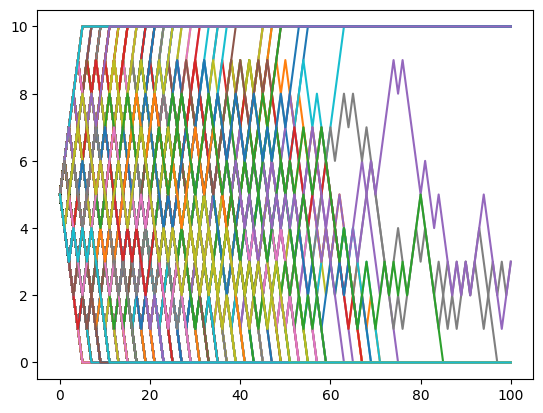

On a donc un p = 0.125
La vraie valeur théorique est : [0.11636364]
Ici, notre probabilité empirique est de 0.125 et la vraie valeur est 0.116 pour M = 1000
L'intervalle de confiance à 95% est donc : [0.10450182934991514, 0.14549817065008486]
La vraie valeur est donc dans l'intervalle de confiance à 95%


In [34]:
### c) Avec p = 0.4

test_Q1_c = Q1_a(simulation_jeu(p= 0.4))
print("On a donc un p = {}".format(test_Q1_c))


#### Calcul de la vraie valeur

F = np.zeros((9, 1))
P = np.zeros((9, 9))
for i in range(0, 9):
    if (i != 0):
        P[i, i-1] = 0.6
    if (i != 8):
        P[i, i+1] = 0.4

I = np.identity(9)
b = np.zeros((9, 1))
b[8] = 0.4

F = np.linalg.solve(I - P, b)
print("La vraie valeur théorique est : {}".format(F[4]))


print("Ici, notre probabilité empirique est de {} et la vraie valeur est 0.116 pour M = 1000".format(test_Q1_c))
z1 = test_Q1_c - 1.96 * (test_Q1_c*(1-test_Q1_c)/1000)**(1/2)
z2 = test_Q1_c + 1.96 * (test_Q1_c*(1-test_Q1_c)/1000)**(1/2)
print("L'intervalle de confiance à 95% est donc : [{}, {}]".format(z1, z2))
if (z1 > 0.116 or z2 < 0.116):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")

### Détermination de l'espérance réelle avec p = 0.4 (méthode avec la résolution du système plus bas)

On reprend les calculs précédents jusqu'à l'équation 
$-1 = p(D(x+1) - D(x)) - (1-p)(D(x) - D(x-1))$
si $p = 0.4$, alors

On peut réécrire l'équation sous la forme:
$$
\forall x \in [0, ...,  8], D(x+1) = 1 + p * D(x+2) + (1 - p) * D(x)
$$
donc
$$
D(x+2) - D(x+1) = \frac{1-p}{p} (D(x+1) - D(x)) - 1/p
$$
On pose $V(x) = D(x+1) - D(x)$ donc $V(x+1) = \frac{1-p}{p} V(x) - 1/p$

On pose $r = -\frac{1}{p(1-\frac{1-p}{p})} = -\frac{1}{2p - 1}$
Donc
$V(x) = (\frac{1-p}{p})^x (V(0) +  \frac{1}{2p - 1}) -  \frac{1}{2p - 1}$
Donc

$$
D(x+1) - D(x) = (\frac{1-p}{p})^x (D(1) - D(0) +  \frac{1}{2p - 1}) -  \frac{1}{2p - 1}
$$
Donc par téléscopage, $\forall x \in [0, ..., 9]$:

$$
D(x+1) - D(0) = (D(1) - D(0) +  \frac{1}{2p - 1}) \sum_{i = 0}^{x} (\frac{1-p}{p})^i - (x+1) \frac{1}{2p - 1}
$$
$D(x+1) = (D(1) +  \frac{1}{2p - 1}) \frac{p}{2p-1} (1 - (\frac{1-p}{p})^{x+1}) - (x+1)  \frac{1}{2p - 1}$ car $D(0) = 0$

Pour $x = 9$ et $p = 0.4$, on a: 
$D(10) = 0 = - (D(1) - \frac{1}{0.2}) \frac{0.4}{0.2} (1 - (\frac{0.6}{0.4})^{10}) + (10) \frac{1}{0.2}$

On a finalement $D(1) \approx 4.56$ et donc
$$
D(5) \approx 19.1975
$$

In [35]:
### Verification avec Python

F = np.zeros((9, 1))
P2 = np.zeros((9, 9))
for i in range(0, 9):
    if (i != 0):
        P2[i, i-1] = 0.6
    if (i != 8):
        P2[i, i+1] = 0.4

I = np.identity(9)
b = np.ones((9, 1))

F = np.linalg.solve(I - P2, b)
print("La vraie valeur théorique est : {}".format(F[4]))

La vraie valeur théorique est : [19.18181818]


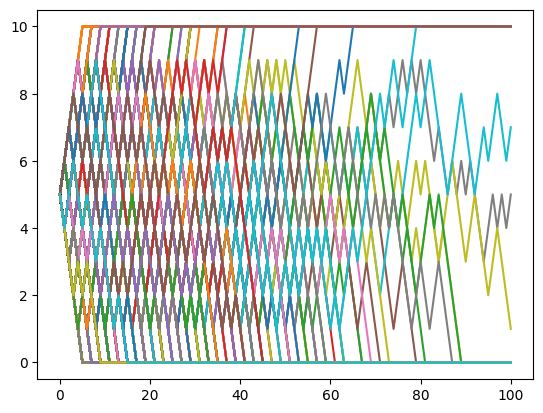

La moyenne empirique du temps de survie est de 18.686 tours.


In [36]:
tau_Q1_c = tau_Q1(simulation_jeu(p= 0.4))
moyenne_tau_c = np.mean(tau_Q1_c)
print("La moyenne empirique du temps de survie est de {} tours.".format(moyenne_tau_c))
# C'est un nouvel échantillon mais M est assez grand pour qu'on suppose universel

In [37]:
print("Ici, l'espérance empirique est de {} et la vraie valeur est 19.20 pour M = 1000".format(moyenne_tau_c))
M = 1000
b1 = moyenne_tau_c - 1.96 * (np.sum((tau_Q1_c[:-1] - tau_Q1_c[-1] )**2) / (M**2 - M))**(1/2)
b2 = moyenne_tau_c + 1.96 * (np.sum((tau_Q1_c[:-1] - tau_Q1_c[-1] )**2) / (M**2 - M))**(1/2)
print("L'intervalle de confiance à 95% est donc : [{}, {}]".format(b1, b2))
if (b1 > 19.20 or b2 < 19.20):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")


Ici, l'espérance empirique est de 18.686 et la vraie valeur est 19.20 pour M = 1000
L'intervalle de confiance à 95% est donc : [17.7660596476663, 19.6059403523337]
La vraie valeur est donc dans l'intervalle de confiance à 95%


In [38]:
## Question 2
    
### a)

# on définit une matrice de transition
n = 10
P = np.random.rand(n, n)
row_sums = P.sum(axis=1)
P = P / row_sums[:, np.newaxis]
print(P)

# on simule N trajectoires
N = 1000

# on définit une fonction qui simule une trajectoire
# P est la matrice de transition
# N est le nombre de pas de la chaîne
# z est la valeur initiale
def sim_traj(P, N, z):
    vect_pos = np.zeros(N)
    vect_pos[0] = z
    for i in range(1, N):
        vect_pos[i] = np.random.choice(n, 1, p=P[int(vect_pos[i-1]), :])
    return vect_pos

vect_pos = sim_traj(P, N, 1)

# on définit une fonction qui calcule la proportion de temps passé dans chaque zone
# vect_pos est le vecteur des positions
def prop_temps(vect_pos):
    res = np.zeros(n)
    for i in range(n):
        res[i] = sum(vect_pos == i)
    return res/N

print(prop_temps(vect_pos))

def calculer_pi_systeme_lineaire(P):
    n = len(P)
    A = P - np.identity(n)  # (P - I)
    A[-1, :] = 1  # Ajouter la contrainte que la somme des éléments de π doit être égale à 1
    
    b = np.zeros(n)
    b[-1] = 1  

    pi = np.linalg.solve(A, b)
    return pi

print(calculer_pi_systeme_lineaire(P))
print("On remarque que les fractions de temps passé sur chaque zone se rapproche énormément des valeurs de pi.")

[[0.05177088 0.07344106 0.16455419 0.17842202 0.00921458 0.10059581
  0.15746065 0.08177029 0.0640663  0.11870423]
 [0.06864375 0.13753997 0.05319668 0.09338008 0.01093281 0.1604684
  0.15476915 0.15912142 0.11893289 0.04301486]
 [0.15940585 0.07899085 0.33514185 0.03490277 0.17016215 0.06342051
  0.01434923 0.00867984 0.06775057 0.06719638]
 [0.04145007 0.10924645 0.18260118 0.05947965 0.0257144  0.2079169
  0.1161522  0.07461633 0.03954407 0.14327875]
 [0.13389858 0.07054142 0.04709726 0.15183138 0.14821691 0.14830772
  0.0609694  0.037808   0.06516718 0.13616215]
 [0.17875871 0.1208653  0.01918588 0.07770751 0.1780204  0.18624996
  0.03207851 0.0778424  0.07920105 0.05009027]
 [0.05533641 0.08485285 0.16805358 0.13231067 0.14243917 0.03318567
  0.0723652  0.05353144 0.13714459 0.12078042]
 [0.09654546 0.26601199 0.15612573 0.11046492 0.0043738  0.03149364
  0.02487194 0.14587826 0.13207495 0.03215932]
 [0.03381245 0.01844989 0.1722745  0.14158446 0.11013391 0.03098251
  0.03772051 0

In [39]:
### b)
vect_pos_2 = sim_traj(P, N, 6)
print(vect_pos_2)
print(prop_temps(vect_pos_2))
print(calculer_pi_systeme_lineaire(P))
print("On remarque que la zone de départ n'a pas d'influence.")

[6. 3. 9. 6. 3. 6. 2. 2. 2. 1. 3. 6. 6. 9. 8. 9. 7. 5. 0. 2. 3. 2. 2. 2.
 2. 3. 1. 2. 9. 2. 1. 7. 9. 9. 8. 3. 1. 6. 3. 2. 9. 9. 2. 4. 1. 1. 9. 0.
 6. 4. 9. 6. 8. 3. 1. 5. 8. 2. 2. 3. 9. 6. 2. 8. 7. 2. 1. 6. 2. 0. 3. 8.
 6. 3. 6. 5. 5. 5. 5. 5. 5. 4. 8. 4. 8. 2. 5. 5. 1. 6. 8. 6. 4. 4. 5. 7.
 2. 4. 0. 7. 1. 1. 6. 9. 0. 7. 1. 7. 2. 2. 0. 3. 0. 9. 6. 2. 2. 0. 2. 0.
 1. 1. 5. 5. 1. 8. 9. 9. 2. 4. 3. 2. 1. 1. 6. 9. 6. 7. 0. 7. 1. 1. 5. 4.
 0. 2. 4. 9. 2. 2. 4. 8. 8. 9. 7. 2. 4. 5. 9. 5. 0. 8. 6. 1. 7. 7. 8. 7.
 3. 7. 1. 1. 6. 2. 0. 6. 8. 9. 6. 3. 5. 0. 5. 0. 5. 5. 9. 8. 2. 9. 4. 7.
 1. 5. 1. 9. 6. 9. 2. 1. 0. 4. 5. 5. 1. 5. 4. 5. 8. 2. 1. 8. 7. 0. 6. 8.
 4. 1. 3. 2. 2. 7. 0. 2. 3. 2. 0. 2. 6. 8. 2. 1. 7. 3. 1. 9. 8. 3. 3. 7.
 8. 3. 1. 8. 2. 9. 0. 0. 2. 2. 0. 3. 5. 5. 0. 2. 2. 4. 3. 6. 9. 6. 3. 5.
 8. 4. 1. 6. 9. 7. 1. 5. 3. 2. 2. 8. 8. 7. 6. 1. 3. 2. 4. 4. 9. 3. 5. 8.
 7. 9. 0. 6. 9. 7. 2. 1. 5. 5. 5. 1. 0. 8. 7. 0. 1. 7. 8. 9. 8. 3. 3. 9.
 2. 8. 2. 2. 0. 9. 5. 0. 7. 3. 5. 8. 8. 7. 7. 8. 9.

In [40]:
### Question 3

### Verification avec Python
# On prend une matrice stochastique avec que des 0.1
F = np.zeros((9, 1))
P3 = np.full((10, 10), 0.1)
I = np.identity(9)
b = np.ones((9, 1))

F = np.linalg.solve(I - P3[:-1, :-1] , b)
print("La vraie valeur théorique est : {}".format(F[0])) # Début à la case 0

# N est le nombre de pas de la chaîne
# Ne est le nombre de personnes
# Ns est le numéro de la case du monstre
# P est la matrice de transition
def death_time_fixe(Ne=1, Ns=10, P=P3, N=100):
    Nb_tour = 1
    Nb_vivant = Ne
    Mat = np.zeros((N + 1, Ne), dtype=int)
    Mat[0] = 1
    while (Nb_vivant > 0 and Nb_tour < N):
        for m in range(0, Ne):
            if (Mat[Nb_tour-1, m] != -1):
                s = sim_dis(P[(Mat[Nb_tour-1, m]) - 1], np.linspace(1, 10, 10, dtype=int), 1)
                Mat[Nb_tour, m] = s[0]
                if (Mat[Nb_tour, m] == Ns):
                    Mat[Nb_tour, m] = -1
            else:
                Mat[Nb_tour, m] = -1
        Nb_vivant = sum(Mat[Nb_tour] != -1)
        Nb_tour += 1
    return Nb_tour - 1 # Car le premier tour n'est pas compté, c'est l'initialisation

Liste_temps = []
M = 1000 # Nombre de simulation      
for i in range(0, M):
    Liste_temps.append(death_time_fixe())
Liste_temps = np.array(Liste_temps)
moyenne_temps_fixe = np.mean(Liste_temps)
print("La moyenne empirique du temps de survie est de {} tours.".format(moyenne_temps_fixe))

print("Ici, le nombre de tour de survie empirique est de {} et la vraie valeur est 10 pour M = 1000".format(moyenne_temps_fixe))
b1 = moyenne_temps_fixe - 1.96 * (np.sum((Liste_temps[:-1] - Liste_temps[-1] )**2) / (M**2 - M))**(1/2)
b2 = moyenne_temps_fixe + 1.96 * (np.sum((Liste_temps[:-1] - Liste_temps[-1] )**2) / (M**2 - M))**(1/2)
print("L'intervalle de confiance à 95% est donc : [{}, {}]".format(b1, b2))
if (b1 > 10 or b2 < 10):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")


La vraie valeur théorique est : [10.]
La moyenne empirique du temps de survie est de 9.83 tours.
Ici, le nombre de tour de survie empirique est de 9.83 et la vraie valeur est 10 pour M = 1000
L'intervalle de confiance à 95% est donc : [9.23970245333934, 10.42029754666066]
La vraie valeur est donc dans l'intervalle de confiance à 95%


### Question 4

On répète la méthode, mais cette fois-ci, on cherche à résoudre un système linéaire de 100 équations et 100 inconnues. Chaque inconnu correspond à un couple (x, y) qui désigne le temps de survie moyen analytique d'une personne s'il commence en x et que le monstre commence en y. Ainsi, tous les couples (x, x) seront nuls. 

On utilisera la méthode de Jacobi pour déterminer ces solutions sous la forme d'une matrice où les coordonnées seront les solutions.

In [42]:
### Question 4

P4 = np.full((10, 10), 0.1)

# X: matrice des temps de survie où X(i,j) est le temps de survie de la personne s'il commence en i et si le monstre commence en j
X = np.zeros((10, 10))

fin = False
while not fin:
    J = np.zeros((10, 10))
    for i in range(10):
        for j in range(10):
            if i != j:
                s = 0
                for k in range(10):
                    for l in range(10):
                        if k != l:
                            s += X[k, l] * P4[i, k] * P4[j, l]
                J[i, j] = 1 + s
    if np.allclose(X, J, rtol=1e-6):
        fin = True
    else:
        X = J

print("La vraie valeur théorique est : {}".format(X[0, 9])) # Début à la case 0 et monstre à la case 9



Liste_temps = []
M = 1000 # Nombre de simulation      
for i in range(0, M):
    Liste_temps.append(death_time(Ne = 1, Ns = 10, P = P4, Q = P4, N = 100))
Liste_temps = np.array(Liste_temps)
moyenne_temps = np.mean(Liste_temps)
print("La moyenne empirique du temps de survie est de {} tours.".format(moyenne_temps))

print("Ici, le nombre de tour de survie empirique est de {} et la vraie valeur est également 10 pour M = 1000".format(moyenne_temps))
b1 = moyenne_temps - 1.96 * (np.sum((Liste_temps[:-1] - Liste_temps[-1] )**2) / (M**2 - M))**(1/2)
b2 = moyenne_temps + 1.96 * (np.sum((Liste_temps[:-1] - Liste_temps[-1] )**2) / (M**2 - M))**(1/2)
print("L'intervalle de confiance à 95% est donc : [{}, {}]".format(b1, b2))
if (b1 > 10 or b2 < 10):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")

La vraie valeur théorique est : 9.999907386128694
La moyenne empirique du temps de survie est de 10.355 tours.
Ici, le nombre de tour de survie empirique est de 10.355 et la vraie valeur est également 10 pour M = 1000
L'intervalle de confiance à 95% est donc : [9.623853914324505, 11.086146085675496]
La vraie valeur est donc dans l'intervalle de confiance à 95%


On constate donc que le mouvement du monstre n'a aucune influence sur la survie du joueur si on prend la matrice stochastique de 0.1 pour tous les coefficients.